# Chapitre 1 : Bases d'un réseau de neurones et reconnaissance manuscrite

> L'objectif de ce chapitre est de comprendre la base d'un réseau de neurones virtuel et son fonctionnement. Nous allons aussi mettre en place un réseau de neruones permettant de reconnaitre l'écriture de nombres mauscrits.

> Ce Notebook présente mes notes prises durat la lecture du [Chapitre 1 du livre Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) par Michael Nielsen

In [1]:
# Librairies utilisées dans ce notebook
import math
from matplotlib import pyplot as plt
import numpy as np

## Perceptrons

Un perceptron est un élément qui dispose de plusieurs entrées binaires (notées $x_1$, $x_2$, $x_3$...) et d'une seul sortie binaire (notée `output`).

![Perceptron](./img/perceptron.png)

> Ce modèle fut inventé dans les années 50 par Frank Rosenblatt

On peut calculer simplement la sortie d'un perceptron en multipliant chaque entrée par un poids associé (notés $w_1$, $w_2$, $w_3$...) puis de comparer le résultat à un seuil (noté `threshold`) propre au perceptron.

Si le seuil est dépasse, la sortier vaut $1$, si non, elle vaut $0$.

On peut alors noter la sortie `output` du perceptron comme suis :

$$
\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}
$$

Pour simplifier cette notation nous allons représenter toutes les entrées comme un vecteur (noté $x$) et l'ensemble des poinds comme un autre vecteur (noté $w$).
Nous pouvons alors remplacer le calcul éfféctué plus haut par un [produit scalaire (dot product)](https://en.wikipedia.org/wiki/Dot_product#Algebraic_definition).
Nous allons aussi remplacer le seuil du perceptron par le **biais du preceptron** (noté $b$) qui est égal au seuil multiplié par $-1$.
On peut considèrer de manière biologique que le biais est la mesure de la facilité qu'un perceptron a de s'activer pour transmettre un signal positif.

On obtiens alors l'equation plus clair suivante :

$$
\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}
$$

In [2]:
# Une fonction permettant de calculer la sortie d'un perceptron sur
# la base de ses entrées et de son biais
def compute_perceptron(inputs, weights, biais):
    if len(inputs) != len(weights):
        raise ValueError("Input and weights must have the same number of elements")
    
    # Calcul de la somme des entrées par les poids
    sum = 0
    for i, x in enumerate(inputs):
        sum += x * weights[i]
    
    # Ajout du biais
    sum += biais
    
    # retour du resultat
    return 0 if sum <= 0 else 1

In [3]:
# Simulation d'une porte NAND
def nand(a,b):
    return compute_perceptron(
        [a, b],
        [-2, -2],
        3
    )

print("0 NAND 0 =", nand(0,0))
print("0 NAND 1 =", nand(0,1))
print("1 NAND 0 =", nand(1,0))
print("1 NAND 1 =", nand(0,0))

0 NAND 0 = 1
0 NAND 1 = 1
1 NAND 0 = 1
1 NAND 1 = 1


## Neurones Sigmoïde

Le problème du perceptron est qu'il est trop binaire. En effet, un simple petit changement dans ses entrées peut entrainer un changement complet de sa sortie de 0 à 1 (ou inversement). Cela se traduit par la difficulté de les combiner en réseaux . Il nous faut transmettre un information plus fine et précise. C'est ce que fait le Neurone Sigmoïde.

Tout comme le perceptron, le neurone Sigmoïde se compose d'entrées et d'un seul sortie. Mais la différence réside dans le fait que les entrées accèptent une valeur entre $0$ et $1$ et que la sortie produit elle aussi un résultat entre $0$ et $1$.

Comme la sortie n'est plus binaire, nous ne pouvons plus utiliser l'équation précédente pour définir la sortie du neurone. La sortie d'un neurone Sigmoïde est égale à $\sigma(w \cdot x+b)$.

ici, $\sigma$ est la définition de la [fonction Sigmoïde](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_%28math%C3%A9matiques%29) (aussi appelée "courbe en S" ou "logistic function") qui se définis comme suis :

$$
\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+e^{-z}}.
\tag{3}\end{eqnarray}
$$

In [4]:
# Definition de la fonction sigmoïde
def sigmoid_function(z):
    return 1 / ( 1 + math.exp(-z) )

Text(0.5, 1.0, 'Fonction Sigmoïde')

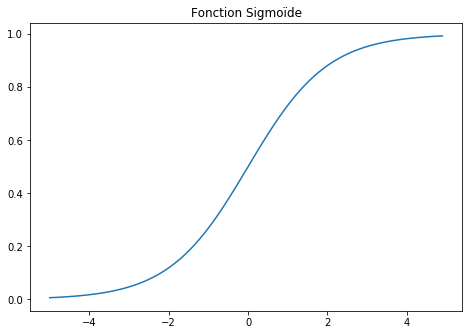

In [5]:
# Tracé de la fonction Sigmoïde
%matplotlib inline

# Axe des Abscisses
x = np.arange(-5, 5, 0.1)
# Calcul de la fonction pour chaque point (axe des ordonnées)
y = list(map(lambda z: sigmoid_function(z) , x))

# Affichage de la figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # Rectangle normalisé pour un affichage correct dans Jupyter
ax.plot(x, y)
ax.set_title("Fonction Sigmoïde")

En fait, on peut remarque que, dans un perceptron, nous passions notre résultat dans une "step function" pour en extraire la valeur de sortie.
Ici, nous passons notre résultat dans une fonction Sigmoïde.

Avec ce type de neurone on dispose d'une sortie qui répond de manière cohérente par rapport aux changelents que l'on apporte aux entrées.
En fait, si on éfféctue qu'un tout petit changement sur les poids ou le biais, il en resultera d'un petit changelent de sortie.

> La quantité de changement d'une valeur $x$ est notée $\Delta x$. Donc la quantité de changement des poids sera notée $\Delta w$, du biais $\Delta b$, etc.

La véritable force de cette fonction c'est la linéarité des changements de la sortie par rapport aux changements des poids et du biais.
En effet le changelent à éfféctuer sur le biais ou les poids peut être calculé a partir de la différence de changelent de la sortie.
Cela rend l'apprentissage possible par le fait que l'on peut déduire les changements à apporter aux poids ou au biais pour obtenir le résultat voulu.

$\sigma$ est ici notre **fonction d'activation**.
Cette fonction d'activation permet de définir la sortie d'un neurone virtuel.
Il est possible d'utiliser n'importe qul fonction qui dispose d'une linéarité dans les changements de sortie comme le fait si bien la fonction Sigmoïde.
Même s'il existe d'autres types de neurones avec des fonctions d'activation différentes, le neurone Sigmoïde reste le plus utilisé.

> La fnction d'activation sera notée $f$ en lieu et place de $\sigma$

In [6]:
# Définition d'un neurone Sigmoïde
def sigmoid_neuron(inputs, weights, biais):
    if len(inputs) != len(weights):
        raise ValueError("Input and weights must have the same number of elements")
        
    sum = 0
    for i, x in enumerate(inputs):
        sum += x * weights[i]
    sum += biais
    
    return sigmoid_function(sum)

## Réseaux de neurones

Un unique neurone peut éfféctuer des tâches d'intelligence artificielle mais est assez limité.
Pour en augmenter les capacités, on agence les neurones en réseaux.
Ces réseaux sont composés de multiples neurones chaucune des sorties reliées aux entrées d'autres neurones, tout comme le cerveaux biologique.

Les réseaux de neurones sont répartis en couches (*layers*) qui se suivent et peuvent être nombreuses dans le cas d'un réseau profond.
On peut séparer les couches en 3 grands types : 

* **Couche d'entrée** (*input layer*) est la première couche du réseau. Elle reçois les données brut d'entrée et chacun de ses neurones est relié à tout les neurones de la couche suivante.
* **Couche de sortie** (*output layer*) est la dernière couche du réseau. Elle est généralement consituée d'un nombre limité de neruones qui représentent les valeurs de sortie du réseau.
* **Couches cachées** (*hidden layers*) Elle peuvent être tres nombreuses ou simplement absentes en fonction de la complexité recherchée. Elle sont simplement les couches intermédière qui font la liaison entre la couche d'entrée et de sortie.

![Réseau de neurones](./img/neural-net.png)

> Dans la documentation ou sur internet, il est possible que certaines personnes parlent de MLPs (pour Multi Layer Perceptrons) en désignant un réseau de neruones Sigmoïde en plusieurs couches.